In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/d_r_602_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1428_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1282_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_93_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/w_r_59_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1992_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1461_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/w_r_101_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/d_r_379_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/d_r_598_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/TEST/images/f_r_1303_.jpg
/kaggle/input/semantic-segmen

In [2]:
# # !!!!!!!!!!!!!!!!! ВАЖНО
# # %%capture
# !pip install --force-reinstall numpy==1.23 # понижение версии чтобы не было ошибки np.float

In [3]:
# !wget --quiet https://raw.githubusercontent.com/pytorch/vision/release/0.12/references/detection/engine.py
# !wget --quiet https://raw.githubusercontent.com/pytorch/vision/release/0.12/references/detection/utils.py
# !wget --quiet https://raw.githubusercontent.com/pytorch/vision/release/0.12/references/detection/transforms.py
# !wget --quiet https://raw.githubusercontent.com/pytorch/vision/release/0.12/references/detection/coco_eval.py
# !wget --quiet https://raw.githubusercontent.com/pytorch/vision/release/0.12/references/detection/coco_utils.py
# !pip install -q -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

In [4]:
# !wget --quiet https://github.com/sizhky/torch_snippets.git
!pip install torch_snippets
from torch_snippets import *
from torch_snippets.inspector import inspect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 826.2 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 23.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 56.3 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 86.4 MB/s eta 0:00:00:00:01
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=6ad5a24a05926717f610c92f05b2b94b644727077f206c7f6c65b94c7e7d2afb
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing

In [5]:
# from torch_snippets import *
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchinfo import summary
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T, models, datasets
from xml.etree import ElementTree as et
import torchvision
import glob
import cv2
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
# import torchvision
# from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

# from engine import train_one_epoch, evaluate
# import utils
# import transforms as T

In [7]:
p = glob.glob('/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/*')
a = glob.glob('/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/*')

pics = sorted([str(i) for i in p])
anns = sorted([str(i) for i in a])

# pics = pics[:600]
# anns = anns[:600]

In [8]:
pics[:5]

['/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_103_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_105_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_112_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_113_.jpg',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_125_.jpg']

In [9]:
anns[:5]

['/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_103_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_105_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_112_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_113_.bmp',
 '/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_125_.bmp']

In [10]:
len(pics), len(anns)

(1525, 1525)

In [11]:
# show(image, sz=6)

# **1. Преобразуем цветнцю маску в черно-белую с определением классов**

In [12]:
targets2label = {0 : 'вода', 3 : 'роботы', 9 : 'растения', 12 : 'рыбы', 18 : 'люди', 21 : 'риф_губки', 27 : 'корабли_руины', 30 : 'дно'}

In [13]:
# делает маску с одним каналом размерности (480, 640) в котором все значения соответствуют targets2label (см. выше)
def mask_to_mask(annotaition_way):
    an = cv2.imread(annotaition_way)
    an = cv2.cvtColor(an,cv2.COLOR_BGR2RGB)
    r,g,b = an.transpose(-1,0,1).astype('int')
    ff = (r/255*3)+(g/255*9)+(b/255*18)
    mask = np.array(ff, dtype=int)
    return mask

In [14]:
len(targets2label)

8

In [15]:
mask_to_mask(anns[1])

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [27, 27, 27, ...,  0,  0,  0],
       [27, 27, 27, ...,  0,  0,  0],
       [27, 27, 27, ...,  0,  0,  0]])

# **2. Смотрим картинки и аннотации**

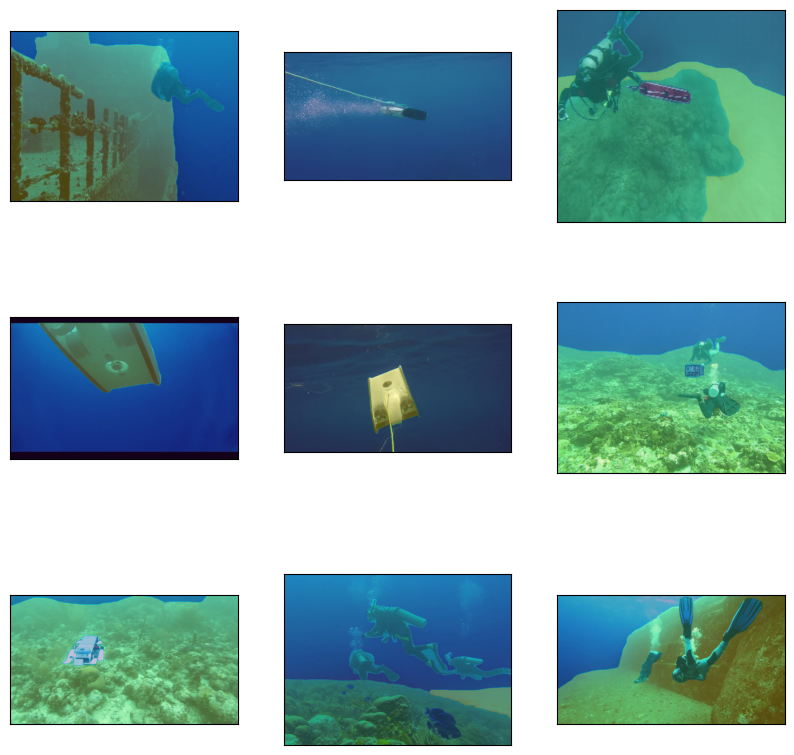

In [16]:
#Lets plot some samples
rows,cols=3,3
fig=plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    img_path=pics[i]
    msk=mask_to_mask(anns[i])
    img=cv2.imread(img_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#     msk=cv2.imread(msk_path)
    plt.imshow(img)
    plt.imshow(msk,alpha=0.3)
    plt.xticks([]), plt.yticks([])
plt.show()

# **3. Смотрим маски**

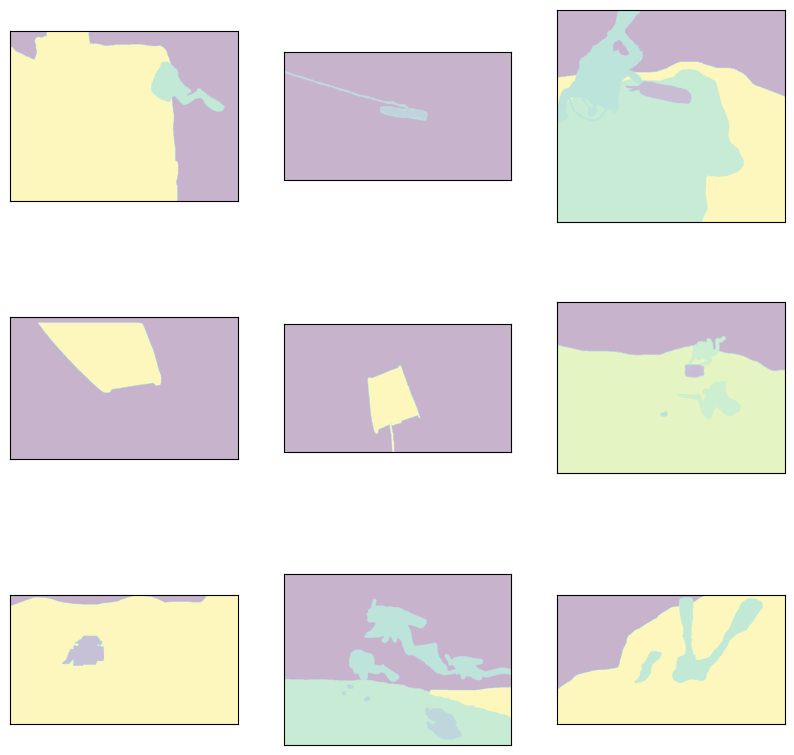

In [17]:
#Lets plot some samples
rows,cols=3,3
fig=plt.figure(figsize=(10,10))
for i in range(1,rows*cols+1):
    fig.add_subplot(rows,cols,i)
    msk=mask_to_mask(anns[i])
    plt.imshow(msk,alpha=0.3)
    plt.xticks([]), plt.yticks([])
plt.show()

# **6. Создаем dataframe**

In [18]:
name_col = ['pictures', 'annotations']
lst = pics, anns
df = pd.DataFrame(np.column_stack(lst), columns = name_col)
print(df.iloc[0,0])
print(df.iloc[0,1])

/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_103_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_103_.bmp


In [19]:
df.head(4)

,pictures,annotations
0,/kaggle/input/semantic-segmentation-of-underwa...,/kaggle/input/semantic-segmentation-of-underwa...
1,/kaggle/input/semantic-segmentation-of-underwa...,/kaggle/input/semantic-segmentation-of-underwa...
2,/kaggle/input/semantic-segmentation-of-underwa...,/kaggle/input/semantic-segmentation-of-underwa...
3,/kaggle/input/semantic-segmentation-of-underwa...,/kaggle/input/semantic-segmentation-of-underwa...


# **7. train_test_split**

In [20]:
# Разбивка данных на основе столбца с именами картинок в df
from sklearn.model_selection import train_test_split
# trn_ids, val_ids = train_test_split(df.pictures.nunique(), test_size=0.1, random_state=99)
trn_ids, val_ids = train_test_split(df.pictures, test_size=0.2, random_state=99)
# trn_ids = list(trn_ids)
# val_ids = list(val_ids)
# типа разбивка df на train_df и val_df на основе разбивки train_test_split
trn_df, val_df = df[df['pictures'].isin(trn_ids)], df[df['pictures'].isin(val_ids)]
#print(trn_df, val_df)
len(trn_df), len(val_df)

(1220, 305)

In [21]:
print(trn_df.iloc[0,0])
print(trn_df.iloc[0,1])

/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/images/d_r_103_.jpg
/kaggle/input/semantic-segmentation-of-underwater-imagery-suim/train_val/masks/d_r_103_.bmp


# **8. Трансформации**

In [22]:
tfms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
])

# **8. Преобразуем маску в нужный нам вид**

# **Входные данные маски с тремя каналами из нулей и единиц:**

Категория объекта	Символ	Код RGB

Фон (водоем)	BW	000 (черный)

Люди -дайверы	HD	001 (синий)

Водные растения и морская трава	PF	010 (зеленый)

Затонувшие корабли и руины	WR	011 (небо)

Роботы (AUV/ ROV/инструменты)	RO	100 (красный)

Рифы и беспозвоночные	RI	101 (розовый)

Рыбы и позвоночные	FV	110 (желтый)

Морское дно и скалы	SR	111 (белый)

**т.е. проще говоря например роботы имеют 3 канала: в первом 1, во втором 0, в третьем 0**

In [23]:
# делает маску с одним каналом размерности (480, 640) в котором все значения соответствуют targets2label (см. выше)
# 1. из 3-х каналов делаем 1 канал и присваиваем значения классам согласно lst
# 2. после cv2.resize появляются новые значения в маске по углам классов, мы из меняем на нейтральное значение  18
# 3. 
def mask_to_mask_resize(annotaition_way):
    lst = [0, 3, 9, 12, 18, 21, 27, 30]
    dct = {3:1, 9:2, 12:3, 18:4, 21:5, 27:6, 30:7}
# ---------------------------------------------------------
# 0. Преобразования входного изображения:
    an = cv2.imread(annotaition_way)
#     an = np.resize(an, (224,224))
    an = cv2.resize(an, (224,224))#, interpolation=cv2.INTER_AREA)
    an = cv2.cvtColor(an,cv2.COLOR_BGR2RGB)
    #     print(an)
    r,g,b = an.transpose(-1,0,1).astype('int')
#     print(r)
# ---------------------------------------------------------
# 1. из 3-х каналов делаем 1 канал и присваиваем значения классам согласно dct:
    ff = (r/255*3)+(g/255*9)+(b/255*18)
    mask = np.array(ff, dtype=int)

    for _ in mask:
        for j in range(len(_)):
            if _[j] not in lst:
                _[j] = 4
            elif _[j] == 0: continue
            else:
                _[j] = dct[_[j]]
# ---------------------------------------------------------
# 2. Создаем массив array размерности (224, 224, 3):
    msc =[]
    for i in np.arange(3):
        msc.append(mask)
    return np.array(msc).astype(np.uint8).transpose(1,2,0)

In [24]:
t = mask_to_mask_resize(anns[0])#/30

In [25]:
t.shape

(224, 224, 3)

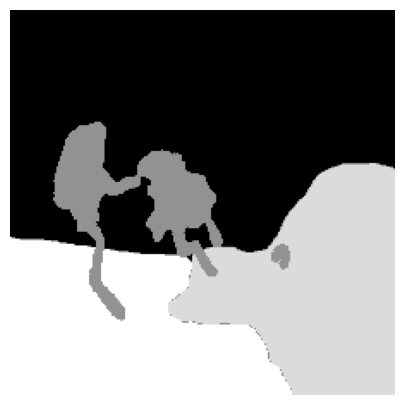

In [26]:
show(t.transpose(-1,0,1)[1])

# **9. Создаем DataLoader**

In [49]:
class SegData(Dataset):
    def __init__(self, df):
        self.pictures = df.pictures.tolist()
        self.annotations = df.annotations.tolist()
    def __len__(self):
        return len(self.pictures)
    def __getitem__(self, ix):
        image = read(self.pictures[ix], 1)
#         print(image.shape)
        image = cv2.resize(image, (224,224))
#         print(image.shape)
        mask = mask_to_mask_resize(self.annotations[ix])#/30
#         print(mask.shape)
#         mask = cv2.resize(mask, (224,224))
#         print(mask.shape)
        return image, mask.transpose(-1,0,1)
    def choose(self): return self[randint(len(self))]
    def collate_fn(self, batch):
        ims, masks = list(zip(*batch))
        ims = torch.cat([tfms(im.copy()/255.)[None] for im in ims]).float().to(device)
        ce_masks = torch.cat([torch.Tensor(mask[0][None]) for mask in masks]).long().to(device)
        return ims, ce_masks

In [50]:
trn_ds = SegData(trn_df)
val_ds = SegData(val_df)
trn_dl = DataLoader(trn_ds, batch_size=16, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, batch_size=8, shuffle=False, collate_fn=val_ds.collate_fn)

In [30]:
# show(gh)
# for i in trn_ds:
#     gh = i[1]
#     print(i[0].shape)
#     print(i[1])
#     break

In [31]:
# for i in trn_ds:
#     print(i)
#     print(i[0].shape)
#     show(i[1].shape)
# #     print((i[1][4]))
#     break

(array([[[ 77, 162, 248],
        [ 73, 159, 244],
        [ 69, 159, 243],
        ...,
        [117, 203, 254],
        [122, 208, 255],
        [118, 204, 254]],

       [[ 68, 159, 242],
        [ 72, 163, 246],
        [ 68, 159, 242],
        ...,
        [114, 202, 252],
        [116, 204, 254],
        [114, 202, 252]],

       [[ 64, 160, 244],
        [ 64, 159, 243],
        [ 68, 160, 245],
        ...,
        [113, 202, 254],
        [112, 202, 254],
        [112, 202, 254]],

       ...,

       [[  0, 145, 190],
        [  8, 156, 201],
        [  5, 154, 198],
        ...,
        [  0,  12,  28],
        [  0,  12,  28],
        [  0,  12,  28]],

       [[  5, 141, 186],
        [  0, 138, 183],
        [  7, 149, 193],
        ...,
        [  0,  12,  28],
        [  0,  12,  28],
        [  0,  12,  28]],

       [[  5, 132, 177],
        [  4, 134, 178],
        [  3, 139, 181],
        ...,
        [  0,  12,  28],
        [  0,  12,  28],
        [  0,  12,  28]

(3, 224, 224)

In [32]:
# for i in trn_dl:
#     print(i)
#     print(i[0].shape)
#     show(i[1].shape)
# #     print((i[1][4]))
#     break

(tensor([[[[-0.7993, -0.7479, -0.6965,  ..., -1.0219, -0.9877, -0.8849],
          [-0.7993, -0.7650, -0.6965,  ..., -0.9705, -0.9192, -0.0458],
          [-0.7822, -0.7650, -0.7137,  ..., -0.7137,  0.8104,  0.5193],
          ...,
          [-0.5082, -0.5082, -0.4568,  ..., -1.9295, -1.9467, -1.9467],
          [-0.5596, -0.4739, -0.3712,  ..., -1.9124, -1.9467, -1.9980],
          [-0.5767, -0.4226, -0.1999,  ..., -1.8610, -1.9467, -1.9980]],

         [[ 0.6954,  0.7129,  0.7479,  ...,  0.2052,  0.1352,  0.1176],
          [ 0.6954,  0.7129,  0.7479,  ...,  0.2052,  0.1702,  1.0105],
          [ 0.7129,  0.6954,  0.7304,  ...,  0.4678,  1.9559,  1.6408],
          ...,
          [ 1.1331,  1.0980,  1.1506,  ..., -1.7206, -1.7381, -1.7381],
          [ 1.0805,  1.1506,  1.2381,  ..., -1.7031, -1.7381, -1.7906],
          [ 1.0630,  1.1856,  1.4307,  ..., -1.6506, -1.7381, -1.7906]],

         [[ 1.1759,  1.2108,  1.2457,  ...,  0.8797,  0.8622,  0.8274],
          [ 1.1759,  1.2108, 

torch.Size([2, 224, 224])

In [33]:
# for i in trn_dl:
#     print(i[1])
#     for _ in i[1]:
#         print(_)
    
#     break

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [5, 5, 5,  ..., 7, 7, 7],
         [5, 5, 5,  ..., 7, 7, 7],
         [5, 5, 5,  ..., 7, 7, 7]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [7, 7, 7,  ..., 7, 7, 7],
         [7, 7, 7,  ..., 7, 7, 7],
         [7, 7, 7,  ..., 7, 7, 7]]], device='cuda:0')
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [5, 5, 5,  ..., 7, 7, 7],
        [5, 5, 5,  ..., 7, 7, 7],
        [5, 5, 5,  ..., 7, 7, 7]], device='cuda:0')
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [7, 7, 7,  ..., 7, 7, 7],
        [7, 7, 7,  ..., 7, 7, 7],
        [7, 7, 7,  ..., 7, 7, 7]], device='cuda:0')


In [34]:
# # смотрим DataLoader

# for i in trn_dl:
#   print(i)
#   print(i[0].shape)
#   print(i[1].shape)
# #   r,g,b = i[1]
#   lst = []
#   for _ in i[1]:
# #       k = r,g,b
# #       h = 'rgb'
#       for k in _:
#           for j in k:
#               if j not in lst: lst.append(j)
#       print(f'Значения в канале : {lst}')

#   break

(tensor([[[[-1.4672, -1.4843, -1.3987,  ..., -1.4843, -1.3302, -1.2103],
          [-1.4672, -1.4672, -1.4329,  ..., -1.4843, -1.3130, -1.1932],
          [-1.4329, -1.4329, -1.4158,  ..., -1.4500, -1.2959, -1.1760],
          ...,
          [-1.8610, -1.8268, -1.7583,  ..., -1.7240, -1.7754, -1.7240],
          [-1.8097, -1.7925, -1.7583,  ..., -1.2274, -1.3130, -1.5357],
          [-1.7583, -1.7754, -1.7583,  ..., -0.6109, -0.5082, -0.4739]],

         [[ 0.3803,  0.3803,  0.3978,  ...,  0.2752,  0.1702,  0.0826],
          [ 0.4153,  0.4328,  0.4678,  ...,  0.2752,  0.1877,  0.1001],
          [ 0.4853,  0.4853,  0.5028,  ...,  0.3102,  0.2052,  0.1176],
          ...,
          [-1.1604, -1.1254, -1.0553,  ..., -0.3200, -0.4951, -0.5301],
          [-1.0903, -1.0903, -1.0903,  ...,  0.3102,  0.1176, -0.1800],
          [-1.0203, -1.0553, -1.0903,  ...,  1.0280,  1.0805,  1.0105]],

         [[ 0.7402,  0.7402,  0.7751,  ...,  0.3568,  0.3393,  0.3219],
          [ 0.7576,  0.7751, 

# **10. Смотрим картинку, маску и картинку с наложенной маской (в одну строку)**

In [37]:
x = iter(trn_ds)

(224, 224, 3)
(3, 224, 224)


<function matplotlib.pyplot.show(close=None, block=None)>

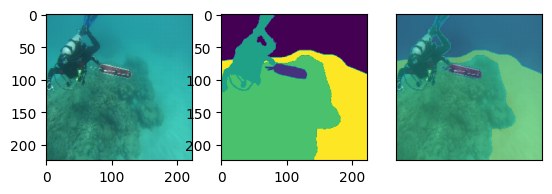

In [52]:
# входные данные должны быть размера (224, 224, 3) и (3, 224, 224)
im,m = next(x)
print(im.shape)
print(m.shape)
m = m[0]#.transpose(1,2,0)
fig, ax = plt.subplots(1,3)
ax[0].imshow(im)
ax[1].imshow(m)
ax[2].imshow(im)
ax[2].imshow(m,alpha=0.3)
plt.xticks([]), plt.yticks([])
plt.show

# **11. Обучение**

In [54]:
def conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )

In [55]:
def up_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
        nn.ReLU(inplace=True)
    )

In [56]:
from torchvision.models import vgg16_bn
class UNet(nn.Module):
    def __init__(self, weights=True, out_channels=8):
        super().__init__()

        self.encoder = vgg16_bn(weights=weights).features
        self.block1 = nn.Sequential(*self.encoder[:6])
        self.block2 = nn.Sequential(*self.encoder[6:13])
        self.block3 = nn.Sequential(*self.encoder[13:20])
        self.block4 = nn.Sequential(*self.encoder[20:27])
        self.block5 = nn.Sequential(*self.encoder[27:34])

        self.bottleneck = nn.Sequential(*self.encoder[34:])
        self.conv_bottleneck = conv(512, 1024)

        self.up_conv6 = up_conv(1024, 512)
        self.conv6 = conv(512 + 512, 512)
        self.up_conv7 = up_conv(512, 256)
        self.conv7 = conv(256 + 512, 256)
        self.up_conv8 = up_conv(256, 128)
        self.conv8 = conv(128 + 256, 128)
        self.up_conv9 = up_conv(128, 64)
        self.conv9 = conv(64 + 128, 64)
        self.up_conv10 = up_conv(64, 32)
        self.conv10 = conv(32 + 64, 32)
        self.conv11 = nn.Conv2d(32, out_channels, kernel_size=1)
    def forward(self, x):
        block1 = self.block1(x)
        block2 = self.block2(block1)
        block3 = self.block3(block2)
        block4 = self.block4(block3)
        block5 = self.block5(block4)

        bottleneck = self.bottleneck(block5)
        x = self.conv_bottleneck(bottleneck)

        x = self.up_conv6(x)
        x = torch.cat([x, block5], dim=1)
        x = self.conv6(x)

        x = self.up_conv7(x)
        x = torch.cat([x, block4], dim=1)
        x = self.conv7(x)

        x = self.up_conv8(x)
        x = torch.cat([x, block3], dim=1)
        x = self.conv8(x)

        x = self.up_conv9(x)
        x = torch.cat([x, block2], dim=1)
        x = self.conv9(x)

        x = self.up_conv10(x)
        x = torch.cat([x, block1], dim=1)
        x = self.conv10(x)

        x = self.conv11(x)

        return x

In [42]:
# # с регуляризацией
# ce = nn.CrossEntropyLoss()
# def UnetLoss(preds, targets):
# #     ce_loss = ce(preds, targets)
#     l1_regularization = 0
#     for param in model.parameters():
#         l1_regularization += torch.norm(param,1)
#     ce_loss = ce(preds, targets) + 0.0001*l1_regularization
    
#     acc = (torch.max(preds, 1)[1] == targets).float().mean()
#     return ce_loss, acc


In [58]:
# без регуляризации
ce = nn.CrossEntropyLoss()
def UnetLoss(preds, targets):
    ce_loss = ce(preds, targets)
    acc = (torch.max(preds, 1)[1] == targets).float().mean()
    return ce_loss, acc

In [59]:
def train_batch(model, data, optimizer, criterion):
    model.train()
    ims, ce_masks = data
    _masks = model(ims)
    # print(_masks.shape)
    # print(ce_masks.shape)
    optimizer.zero_grad()
    loss, acc = criterion(_masks, ce_masks)
    loss.backward()
    optimizer.step()
    return loss.item(), acc.item()

@torch.no_grad()
def validate_batch(model, data, criterion):
    model.eval()
    ims, masks = data
    _masks = model(ims)
    loss, acc = criterion(_masks, masks)
    return loss.item(), acc.item()

In [60]:
model = UNet().to(device)
criterion = UnetLoss
optimizer = optim.Adam(model.parameters(), lr=1e-3)
# n_epochs = 23

# **13. Задаем плавающий шаг**

In [46]:
# # здесь по-моему первого достаточно, добавление второго качество почти не улучшает
# from torch.optim.lr_scheduler import StepLR
# scheduler_1 = torch.optim.lr_scheduler.ExponentialLR(optim, gamma=0.9)
# scheduler_2 = torch.optim.lr_scheduler.MultiStepLR(optim, milestones=[30,80], gamma=0.1)

In [61]:
# n_epochs = 20
log = Report(n_epochs)
for ex in range(n_epochs):
    N = len(trn_dl)
    for bx, data in enumerate(trn_dl):
        loss, acc = train_batch(model, data, optimizer, criterion)
        log.record(ex+(bx+1)/N, trn_loss=loss, trn_acc=acc, end='\r')

    N = len(val_dl)
    for bx, data in enumerate(val_dl):
        loss, acc = validate_batch(model, data, criterion)
        log.record(ex+(bx+1)/N, val_loss=loss, val_acc=acc, end='\r')

    log.report_avgs(ex+1)
#     scheduler_1.step() # блок для плавающего шага

EPOCH: 1.000  val_loss: 1.142  trn_loss: 1.319  trn_acc: 0.609  val_acc: 0.636  (148.64s - 3270.10s remaining)
EPOCH: 2.000  val_loss: 1.264  trn_loss: 1.054  trn_acc: 0.666  val_acc: 0.553  (296.99s - 3118.34s remaining)
EPOCH: 3.000  val_loss: 1.153  trn_loss: 1.011  trn_acc: 0.673  val_acc: 0.570  (445.43s - 2969.55s remaining)
EPOCH: 4.000  val_loss: 0.905  trn_loss: 0.943  trn_acc: 0.693  val_acc: 0.708  (593.94s - 2821.19s remaining)
EPOCH: 5.000  val_loss: 0.907  trn_loss: 0.898  trn_acc: 0.705  val_acc: 0.705  (743.08s - 2675.07s remaining)
EPOCH: 6.000  val_loss: 1.015  trn_loss: 0.868  trn_acc: 0.719  val_acc: 0.634  (891.69s - 2526.44s remaining)
EPOCH: 7.000  val_loss: 0.923  trn_loss: 0.839  trn_acc: 0.727  val_acc: 0.701  (1039.66s - 2376.37s remaining)
EPOCH: 8.000  val_loss: 0.828  trn_loss: 0.806  trn_acc: 0.735  val_acc: 0.732  (1189.41s - 2230.15s remaining)
EPOCH: 9.000  val_loss: 0.827  trn_loss: 0.779  trn_acc: 0.749  val_acc: 0.735  (1340.88s - 2085.81s remaining

100%|██████████| 124/124 [00:00<00:00, 1224.55it/s]


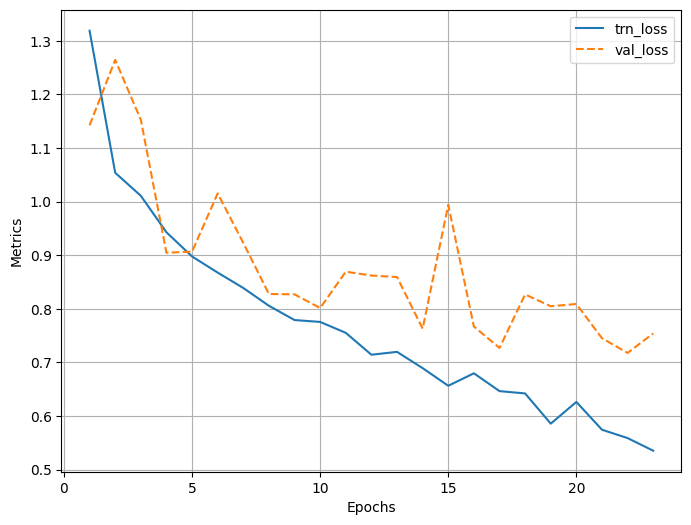

In [63]:
log.plot_epochs(['trn_loss','val_loss'])

100%|██████████| 124/124 [00:00<00:00, 1242.93it/s]


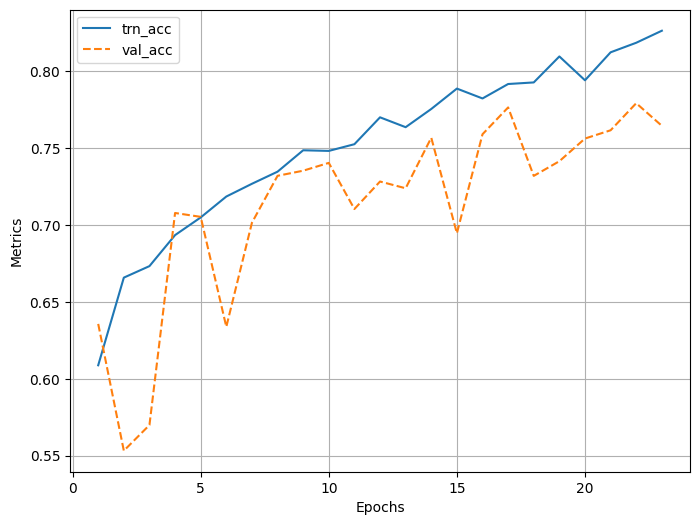

In [65]:
log.plot_epochs(['trn_acc','val_acc'])

In [83]:
x = iter(val_dl)

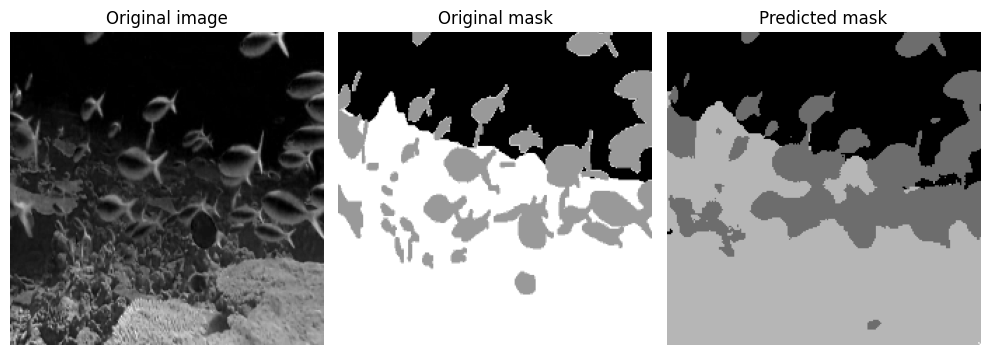

In [98]:
im, mask = next(x)

_mask = model(im)
# print(_mask.shape)
_, _mask = torch.max(_mask, dim=1)
# print(mask.shape)
# print(_mask.shape)

subplots([im[0].permute(1,2,0).detach().cpu()[:,:,0], mask.permute(1,2,0).detach().cpu()[:,:,0]
,_mask.permute(1,2,0).detach().cpu()[:,:,0]],
nc=3, titles=['Original image','Original mask','Predicted mask'],sz=10)

# **15. Сохраняем/загружаем модель**

In [ ]:
save_path = 'Unet_Under_water_multi_semantic_segm.pth'
torch.save(model.state_dict(), save_path)
!du -hsc {save_path} # size of the model on disk

In [ ]:
load_path = 'Unet_Under_water_multi_semantic_segm.pth'
# model.load_state_dict(torch.load(load_path)) #  # строка при загрузке на GРU
model.load_state_dict(torch.load(load_path, map_location=torch.device('cpu'))) # строка при загрузке на СРU

In [ ]:
# for i in anns[:1]:
# #     an = Image.open(i)
#     an = cv2.imread(i)
#     an = cv2.cvtColor(an,cv2.COLOR_BGR2RGB)
#     r,g,b = an.transpose(-1,0,1).astype('int')
#     ff = (r/255*3)+(g/255*9)+(b/255*18)
#     mask = np.array(ff, dtype=int)
# print(mask)
# show(mask,sz=5)